In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')  #ignore all warnings

import scipy
from scipy.stats import norm, skew, kurtosis   #for some statistical analysis

pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))  #to make all float outputs to be in 4 decimal places 

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
#first 3 rows of the train dataframe
train_data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
#last 3 rows of the test datarame
test_data.tail(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1456,2917,20,RL,160.0000,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0000,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0000,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [5]:
#drop the Id column in the training data, as it may not be useful for our predictions
train_data.drop('Id', axis=1, inplace=True)

#store that of the test data
testId = test_data.Id
test_data.drop('Id', axis=1, inplace=True)

In [6]:
#training data desccription
train_data.describe().transpose()     

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0000,56.8973,42.3006,20.0000,20.0000,50.0000,70.0000,190.0000
LotFrontage,1201.0000,70.0500,24.2848,21.0000,59.0000,69.0000,80.0000,313.0000
LotArea,1460.0000,10516.8281,9981.2649,1300.0000,7553.5000,9478.5000,11601.5000,215245.0000
OverallQual,1460.0000,6.0993,1.3830,1.0000,5.0000,6.0000,7.0000,10.0000
OverallCond,1460.0000,5.5753,1.1128,1.0000,5.0000,5.0000,6.0000,9.0000
YearBuilt,1460.0000,1971.2678,30.2029,1872.0000,1954.0000,1973.0000,2000.0000,2010.0000
YearRemodAdd,1460.0000,1984.8658,20.6454,1950.0000,1967.0000,1994.0000,2004.0000,2010.0000
MasVnrArea,1452.0000,103.6853,181.0662,0.0000,0.0000,0.0000,166.0000,1600.0000
BsmtFinSF1,1460.0000,443.6397,456.0981,0.0000,0.0000,383.5000,712.2500,5644.0000
BsmtFinSF2,1460.0000,46.5493,161.3193,0.0000,0.0000,0.0000,0.0000,1474.0000


In [7]:
#test data description
test_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1459.0000,57.3783,42.7469,20.0000,20.0000,50.0000,70.0000,190.0000
LotFrontage,1232.0000,68.5804,22.3768,21.0000,58.0000,67.0000,80.0000,200.0000
LotArea,1459.0000,9819.1611,4955.5173,1470.0000,7391.0000,9399.0000,11517.5000,56600.0000
OverallQual,1459.0000,6.0788,1.4368,1.0000,5.0000,6.0000,7.0000,10.0000
OverallCond,1459.0000,5.5538,1.1137,1.0000,5.0000,5.0000,6.0000,9.0000
YearBuilt,1459.0000,1971.3578,30.3901,1879.0000,1953.0000,1973.0000,2001.0000,2010.0000
YearRemodAdd,1459.0000,1983.6628,21.1305,1950.0000,1963.0000,1992.0000,2004.0000,2010.0000
MasVnrArea,1444.0000,100.7091,177.6259,0.0000,0.0000,0.0000,164.0000,1290.0000
BsmtFinSF1,1458.0000,439.2037,455.2680,0.0000,0.0000,350.5000,753.5000,4010.0000
BsmtFinSF2,1458.0000,52.6193,176.7539,0.0000,0.0000,0.0000,0.0000,1526.0000


In [8]:
#information of data
train_data.info()
#test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

From the operations performed above, we see that each of the features is either continuous(float), discrete(integer) or categorical(object). Some of the features also have missing values in them.

In [9]:
#to get the number of features in each data type category
train_data.get_dtype_counts()

int64      34
object     43
float64     3
dtype: int64

In [10]:
test_data.get_dtype_counts()

int64      25
object     43
float64    11
dtype: int64

<h3>SalePrice</h3>
<p>Let us have more insight into how distributed our dependent variable is.</p>

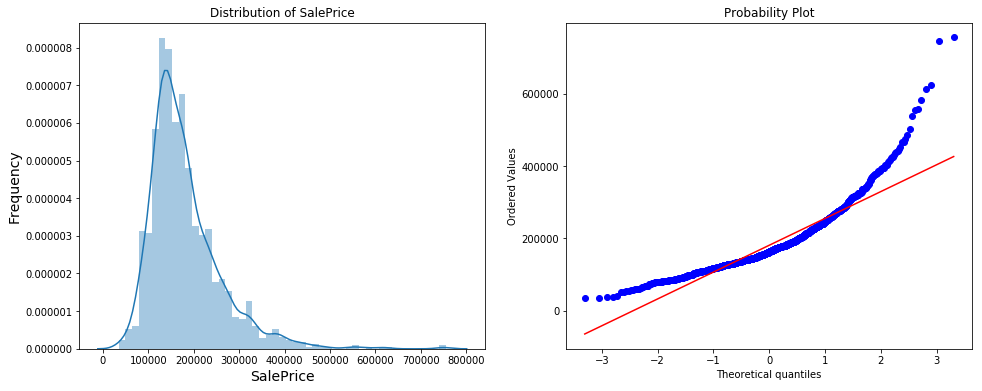

In [11]:
fig, ax = plt.subplots(figsize=(16, 6), nrows=1, ncols=2)

ax1 = sns.distplot(train_data['SalePrice'], ax=ax[0])
ax1.set_title('Distribution of SalePrice')
ax1.set_ylabel('Frequency', fontdict={'size' : 14})
ax1.set_xlabel('SalePrice', fontdict={'size' : 14})


ax2 = scipy.stats.probplot(train_data['SalePrice'], plot=plt)

From the two plots above we can infer that <b>SalePrice</b> is:

<ol>
    <li>Not normally distributed;</li>
    <li>Has its distribution skewed to the right (positive skew);</li>
    <li>Probably has outliers;</li>
</ol>


<h3><b>Skewness</b></h3>

***
<b>Skewness</b> in the field of statistics can be said to be a measure of the imbalance and asymmetry of a data from its mean of distribution. Data is said to be skewed when its mean is not equal to its mode i.e when <b>mean > median</b> or when <b>median > mean</b>. In contrast, whenever data has its mean <b>equal</b> to its median, data is said to be <b>normally distributed</b>. Therefore, <b>skewed</b> data is one which is not <b>normally distributed</b>.

 

<h4>Types of Skew<h4>
<hr></hr>
<b>Positive Skew</b>: <font color='green'>Mean > median</font color='green'>
<p><b>Negative Skew</b>: <font color='green'>Median > mean</font color='green'></p>
<p><b>Zero Skew</b>: <font color='green'>Mean = median (normal distribution)</font color='green'></p>

In [12]:
#let us calculate the mean, median and standard deviation of our the SalePrice variable
print('Mean: {:.3f}'.format(train_data['SalePrice'].mean()))
print('Median: {:.3f}'.format(train_data['SalePrice'].median()))
print('Standard Deviation: {:.3f}'.format(train_data['SalePrice'].std()))

#you can then substitute these values into the formula for skew to get the skewness

Mean: 180921.196
Median: 163000.000
Standard Deviation: 79442.503


In [13]:
#you can get the skewness directly by importing skew from scipy
print('Skew: {:.3f}'.format(skew(train_data['SalePrice'])))

Skew: 1.881


We see that we get the same values for skew on substituting the mean, median and standard deviation into the formula for skew, and by using the scipy library.


It makes very much sense that skew in <b>SalePrice</b> is positive as this means just very few houses cost very much, making the distribution tail extend towards the right side. These few individuals with high income shift the mean towards the right, making the distribution positively skewed!

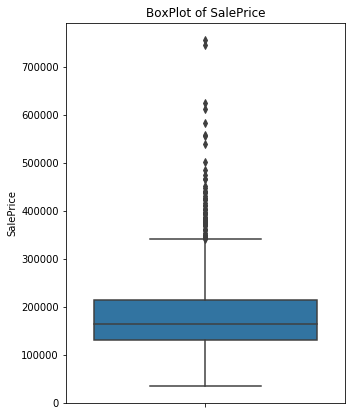

In [14]:
#boxplot to show outliers in SalePrice
plt.figure(figsize=(5, 7))
plt.title('BoxPlot of SalePrice')
sns.boxplot(train_data['SalePrice'], orient='vertical')

Also, from the boxplot, we can also see that <b>SalePrice</b> has a lot of outliers. I would have loved to perform some operations on these outliers, but the author of the dataset recommends us plotting <b>SalePrice</b> against <b>GrLivArea</b> and dropping any houses with more than <b>4000 square feet</b>.

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text xticklabel objects>)

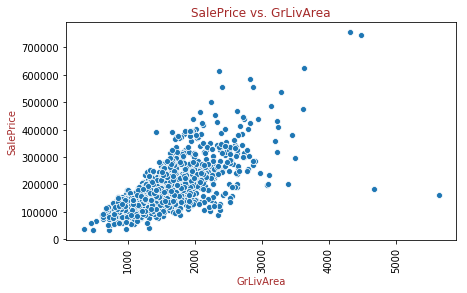

In [15]:
plt.figure(figsize=(7, 4))
plt.title('SalePrice vs. GrLivArea', color='brown')
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data)
plt.xlabel('GrLivArea', color='brown')
plt.ylabel('SalePrice', color='brown')
plt.xticks(rotation=90)

In [16]:
train_data.drop(index=train_data[train_data['GrLivArea']>4000].index.to_list(), axis=0, inplace=True)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 <a list of 9 Text xticklabel objects>)

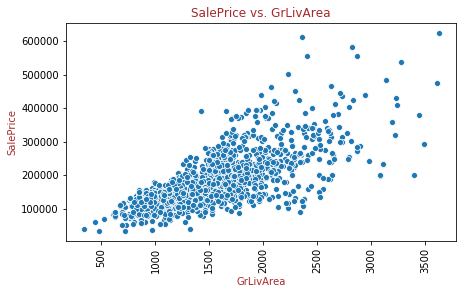

In [17]:
#now plot SalePrice against GrLivArea again
plt.figure(figsize=(7, 4))
plt.title('SalePrice vs. GrLivArea', color='brown')
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data)
plt.xlabel('GrLivArea', color='brown')
plt.ylabel('SalePrice', color='brown')
plt.xticks(rotation=90)

We see that there are no houses with <b>GrLivArea</b> greater than 4000 square feet.

<h3>Assumptions of Linear Regression</h3>
Before modelling with Linear Regression, our dataset has to meet some criteria. The success of any linear regression model is dependent on the following criteria:

<ol>
    <li>Linearity</li>
    <li>Homoscedasticity</li>
    <li>Multivariate Normality</li>
    <li>No multicollinearity</li>
</ol>

<p>Others may include:</p>
<ol start=5>
    <li>Normality of Residulas</li>
    <li>Mean of residulas be zero</li>
</ol>


<h4>Linearity</h4>
There must be a linear relationship between the independent variables and dependent variable of a dataset before linear regression should be carried. The chart below depicts what a linear relationship is;

Text(-14.950000000000003, 0.5, 'SalePrice')

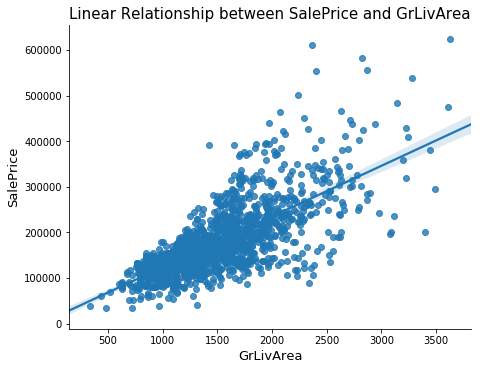

In [18]:
sns.lmplot(x='GrLivArea', y='SalePrice', data=train_data, aspect=1.35)
plt.title('Linear Relationship between SalePrice and GrLivArea', size=15)
plt.xlabel('GrLivArea', size=13)
plt.ylabel('SalePrice', size=13)

<h4>Homoscedasticity</h4>
The term 'homoscedasticity' means that the variance around a regression line is the same for all values of the predictor variable(X). Heteroscedasticity is the exact opposite of homoscedasticity. It means that the variance around a regression line is not the same for all values of the predictor variable(X);

<p><img src="https://upload.wikimedia.org/wikipedia/commons/9/93/Homoscedasticity.png" style="float:left", width=300>
<img src="https://upload.wikimedia.org/wikipedia/commons/a/a5/Heteroscedasticity.png" style="float:left, margin-right :2%;"; width=300></p>


From the two plots, we can infer that if a regression line were fitted in both plots, the variance around the regression line in the homoscedasticity will be the same for all values of the predictor variable, while that of heteroscedasticity won't have the same variance around it. Heteroscedasticity can be solved by making the features of the dataset normally distributed (I'll talk about normal distribution soon).

<h4>Multivariate Normality</h4>
Linear Regression requires all variables of the dataset to have a <b>normal distribution</b>. When features of a dataset are normally distributed, plotting them on a graph results in a bell-shaped curve that is symmetrical;

<p>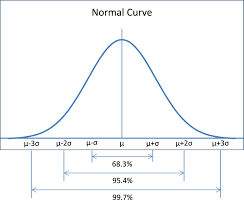
    

<p>There are quite a number of ways to check if features of a dataset have a normal distribution or not. The major ways are to plot a distribution plot and a Quantile-Quantile(Q-Q) plot.</p>

</p>To make features of a dataset have a normal distribution, you can carry out power transforms. The Box-Cox method carries out power transforms pretty well. The boxcox() SciPy function implements the Box-Cox method. It takes an argument, called lambda, that controls the type of transform to perform. Below are some common values for lambda:</p>
<ul>
    <li>lambda = -1. is a reciprocal transform.</li>
    <li>lambda = -0.5 is a reciprocal square root transform.</li>
    <li>lambda = 0.0 is a log transform -------  <i>np.log1p can be used here!</i></li>
    <li>lambda = 0.5 is a square root transform.</li>
    <li>lambda = 1.0 is no transform.</li>
</ul>

In [23]:
correlations = train_data.corrwith(train_data['SalePrice']).sort_values(ascending=False)

In [24]:
correlations.head(10)

SalePrice      1.0000
OverallQual    0.8009
GrLivArea      0.7205
GarageCars     0.6493
TotalBsmtSF    0.6466
GarageArea     0.6370
1stFlrSF       0.6252
FullBath       0.5590
TotRmsAbvGrd   0.5375
YearBuilt      0.5353
dtype: float64

In [25]:
correlations.tail(10)

PoolArea         0.0328
BsmtFinSF2      -0.0089
MiscVal         -0.0211
YrSold          -0.0237
LowQualFinSF    -0.0254
BsmtHalfBath    -0.0368
OverallCond     -0.0802
MSSubClass      -0.0882
EnclosedPorch   -0.1298
KitchenAbvGr    -0.1388
dtype: float64

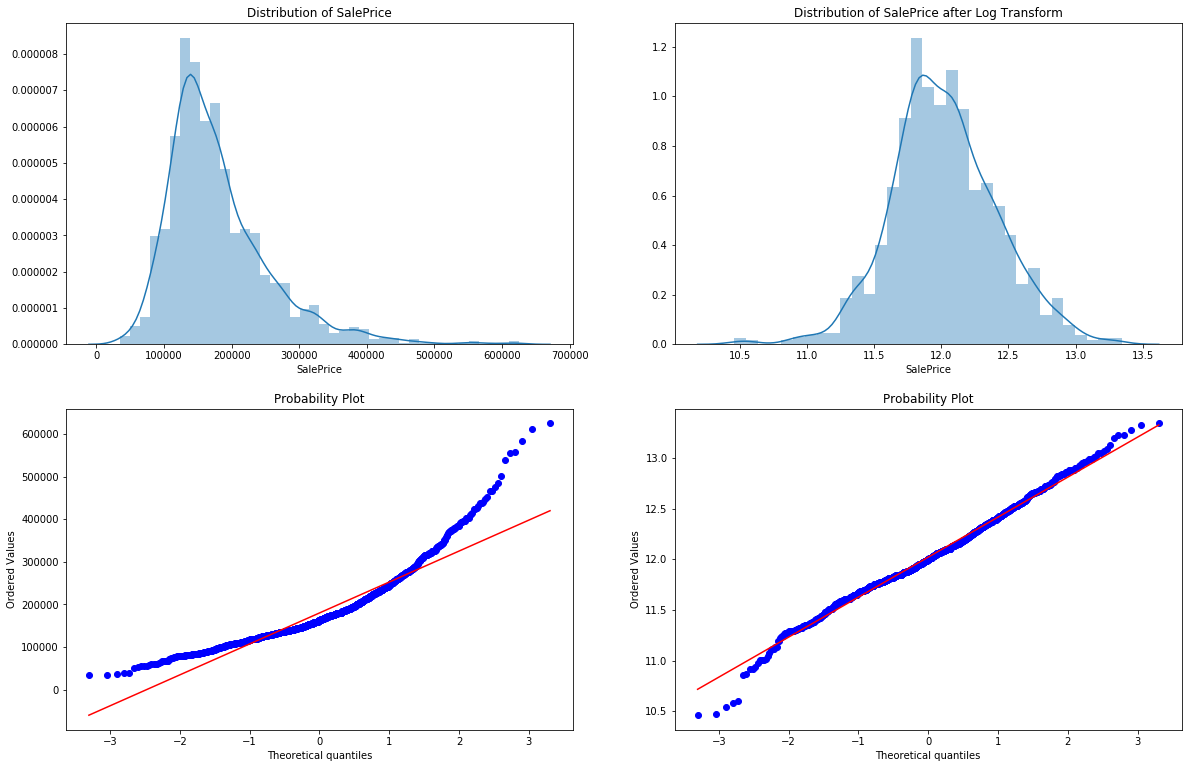

In [19]:
fig, ax = plt.subplots(figsize=(20, 13), nrows=2, ncols=2)

ax1 = sns.distplot(train_data['SalePrice'], ax=ax[0, 0])
ax1.set_title('Distribution of SalePrice')

ax2 = sns.distplot(np.log1p(train_data['SalePrice']), ax=ax[0, 1])
ax2.set_title('Distribution of SalePrice after Log Transform')

ax3 = ax[1, 0]
ax3.set_title('Q-Q Plot of SalePrice')
ax3 = scipy.stats.probplot(train_data['SalePrice'], plot=ax[1, 0])

ax4 = ax[1, 1]
ax4.set_title('Q-Q Plot of SalePrice after Log Transform')
ax4 = scipy.stats.probplot(np.log1p(train_data['SalePrice']), plot=ax[1, 1])

From the distribution plots and QQ-Plots, we see that on performing logarithmic transformation on SalePrice, the distribution looks more like a normal distribution than when no transformation was performed.

Now back to <b>Homoscedasticity</b> and <b>Heteroscedasticity</b>;

Text(0.5, 1.0, 'Homoscedasticity of SalePrice against BsmtUnfSF (after log transform)')

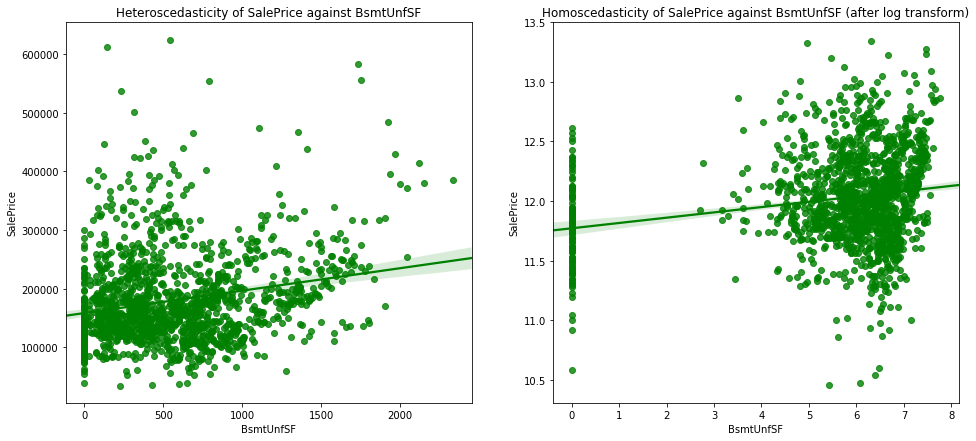

In [20]:
fig, ax = plt.subplots(figsize=(16, 7), nrows=1, ncols=2)

ax1 = sns.regplot(x='BsmtUnfSF', y='SalePrice', data=train_data, ax=ax[0], color='green')
ax1.set_title('Heteroscedasticity of SalePrice against BsmtUnfSF')


ax2 = sns.regplot(x=np.log1p(train_data['BsmtUnfSF']), y=np.log1p(train_data['SalePrice']), ax=ax[1], color='green')
ax2.set_title('Homoscedasticity of SalePrice against BsmtUnfSF (after log transform)')

From the first regression plot above, we notice <font color='brown'>heteroscedasticity</font>: the variance around the regression line is not the same for all values of the predictor variable(BsmtUnfSF). However in the second regression plot, we notice <font color='brown'>homoscedasticity</font>: the variance around the regression line is approximately the same for all values of the predictor variable(<b>BsmtUnfSF</b>); this is as result of the <b>logarithmic transformation of SalePrice</b>.

We can then infer that one way to solve the problem of <font color='brown'>heteroscedasticity</font> in linear regression is to take the logarithmic transformation of the features.

<h4>No or very little multicollinearity</h4>
Multicollinearity is said to happen when there is a strong relationship between the features of a dataset. It is worthy to note that the target variable of a dataset is not considered a feature of the dataset! The best way to check for multicollinearity between the features of a dataset is by plotting a heatmap showing the correlations of each features.

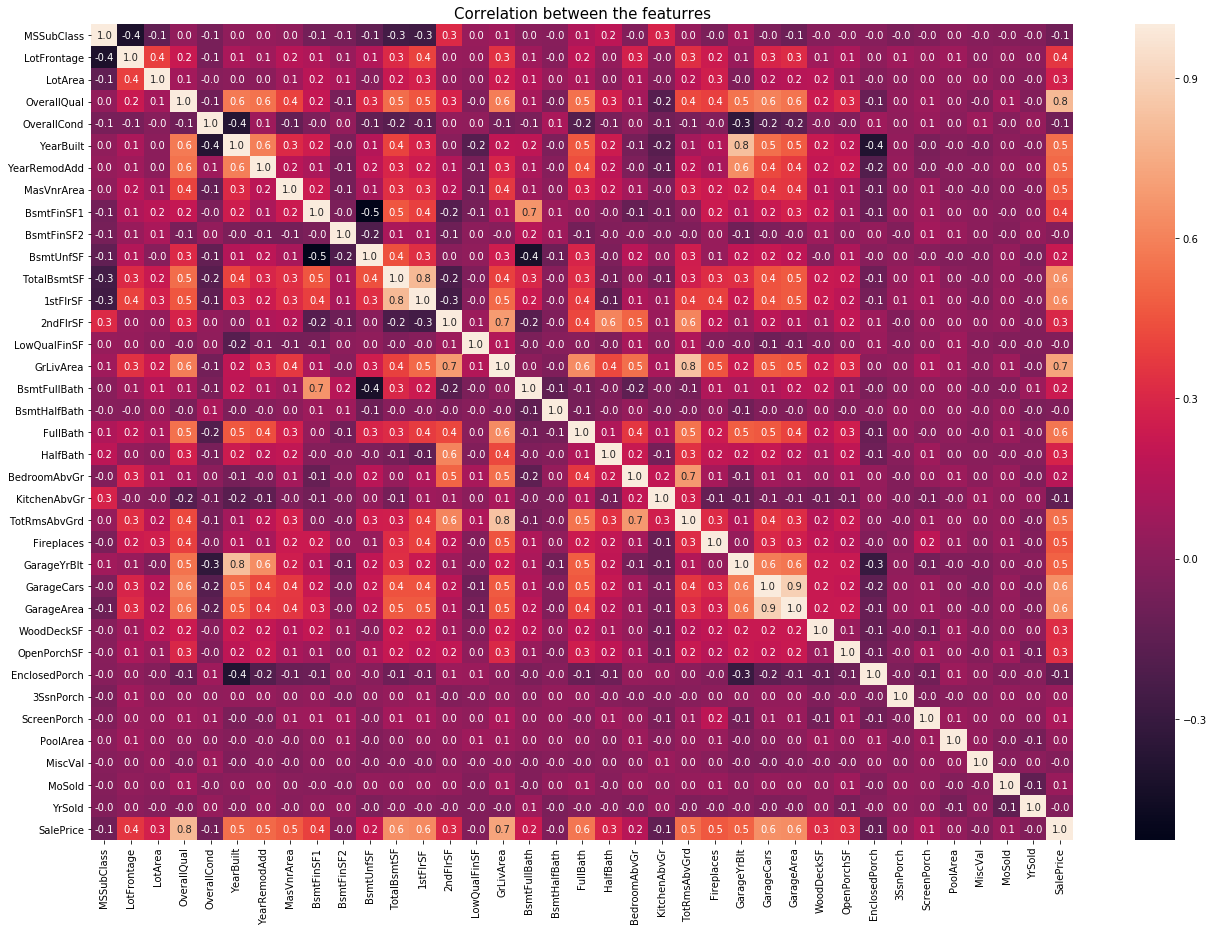

In [21]:
plt.figure(figsize=(22, 15))
plt.title('Correlation between the featurres', size=15)
sns.heatmap(train_data.corr(), annot=True, fmt='.1f')

We can notice multicollinearity between certain features like:

<p><font color='brown'>GarageCars and GarageAreas</font>: <b>0.9</b></p>
<p><font color='brown'>GarageYrBlt and YearBuilt</font>: <b>0.8</b></p>
<p><font color='brown'>TotRmsAbvGrd and BedroomAbvGr</font>: <b>0.7</b></p>


However, I won't drop these features because I will be using regularized linear models which penalizes multicollinearity.

<h3>Feature Engineering</h3>
Feature engineering is purely art! There is no hard and fast rule for performing feature engineering.

In [22]:
train_data.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [23]:
test_data.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [24]:
ntrain = len(train_data)

#bring out the target variable --- SalePrice --- from train_data
salePrice = train_data['SalePrice']

train_data.drop('SalePrice', axis=1, inplace=True)

#concatenate train_data and test_data
data = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)

In [25]:
data.tail(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2910,160,RM,21.0000,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2911,160,RM,21.0000,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2912,20,RL,160.0000,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2913,85,RL,62.0000,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2914,60,RL,74.0000,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [26]:
data.shape

(2915, 79)

<h3>Missing entries</h3>

In [27]:
missing_entries = train_data.isnull().sum()[train_data.isnull().sum().values > 0]

pd.DataFrame(
    {
        'Percentage of missing entries' : missing_entries.values/ntrain * 100,
    }, index = missing_entries.index
).sort_values(by='Percentage of missing entries', ascending=False)

,Percentage of missing entries
PoolQC,99.6566
MiscFeature,96.2912
Alley,93.7500
Fence,80.7692
FireplaceQu,47.3901
LotFrontage,17.7885
GarageType,5.5632
GarageYrBlt,5.5632
GarageFinish,5.5632
GarageQual,5.5632


<h4>Filling missing values</h4>

In [28]:
#I will fill these features with 'None' because the missing values in them represents 'absence'

col_with_absence = ['Alley', 
                   'BsmtQual', 
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'Fence',
                   'FireplaceQu',
                   'GarageFinish',
                   'GarageQual',
                   'GarageCond',
                   'GarageType',
                   'MiscFeature',
                   'MasVnrType',
                   'PoolQC']


for feature in col_with_absence:
    data[feature] = data[feature].fillna('None')

In [29]:
#some features are continuous, so I will fill their missing entries with 0
col_with_missing = ['BsmtFinSF1',
                    'BsmtFinSF2',
                    'BsmtUnfSF',
                    'TotalBsmtSF',
                    'BsmtFullBath', 
                    'BsmtHalfBath', 
                    'GarageYrBlt',
                    'GarageArea',
                    'GarageCars',
                    'MasVnrArea']

for feature in col_with_missing:
    data[feature] = data[feature].fillna(0)

In [30]:
## Replace the following variables by the mode 
col_with_missing_2 = [
    'MSZoning',
    'Utilities',
    'Functional', 
    'SaleType',
    'KitchenQual',
    'Exterior2nd',
    'Exterior1st',
    'Electrical'
]

for feature in col_with_missing_2:
    data[feature] = data[feature].fillna(data[feature].mode()[0])

In [31]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

In [32]:
#any missing values again???
data.isnull().sum().max()  #no!

0

In [33]:
#some features ought to be categorical and not numerical
    
    
## years and months 
data['YearBuilt'] = data['YearBuilt'].astype(str)
data['YearRemodAdd'] = data['YearRemodAdd'].astype(str)
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str) 
data['GarageYrBlt'] = data['GarageYrBlt'].astype(str)
    
    
## type of zoning. 
data['MSSubClass'] = data['MSSubClass'].astype(str)    

#condition of the house
data['OverallCond'] = data['OverallCond'].astype(str)  
data['OverallQual'] = data['OverallQual'].astype(str)

In [34]:
# Adding total sqfootage feature 
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

Skewness of each of the features

In [35]:
data.get_dtype_counts()

float64    11
int64      18
object     51
dtype: int64

In [36]:
data.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,60,RL,65.0000,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,2566.0000
1,20,RL,80.0000,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,2524.0000
2,60,RL,68.0000,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,2706.0000


In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
#there are some features that are ordinal i.e there are intervals between their entries
#e.g in OverallCond, poor < fair < average < good < excellent
#I will love to treat them as ordinal, and will not convert them to dummy variables

features = [
    'FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold'
]


for feature in features:
    encoder = LabelEncoder()
    data[feature] = encoder.fit_transform(data[feature].values)

In [39]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,10,RL,65.0000,8450,1,1,3,Lvl,AllPub,Inside,...,0,3,4,None,0,4,2,WD,Normal,2566.0000
1,5,RL,80.0000,9600,1,1,3,Lvl,AllPub,FR2,...,0,3,4,None,0,7,1,WD,Normal,2524.0000
2,10,RL,68.0000,11250,1,1,0,Lvl,AllPub,Inside,...,0,3,4,None,0,11,2,WD,Normal,2706.0000
3,11,RL,60.0000,9550,1,1,0,Lvl,AllPub,Corner,...,0,3,4,None,0,4,0,WD,Abnorml,2473.0000
4,10,RL,84.0000,14260,1,1,0,Lvl,AllPub,FR2,...,0,3,4,None,0,3,2,WD,Normal,3343.0000


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 80 columns):
MSSubClass       2915 non-null int64
MSZoning         2915 non-null object
LotFrontage      2915 non-null float64
LotArea          2915 non-null int64
Street           2915 non-null int64
Alley            2915 non-null int64
LotShape         2915 non-null int64
LandContour      2915 non-null object
Utilities        2915 non-null object
LotConfig        2915 non-null object
LandSlope        2915 non-null int64
Neighborhood     2915 non-null object
Condition1       2915 non-null object
Condition2       2915 non-null object
BldgType         2915 non-null object
HouseStyle       2915 non-null object
OverallQual      2915 non-null object
OverallCond      2915 non-null int64
YearBuilt        2915 non-null object
YearRemodAdd     2915 non-null object
RoofStyle        2915 non-null object
RoofMatl         2915 non-null object
Exterior1st      2915 non-null object
Exterior2nd      2915 non

In [41]:
numeric_data = data.select_dtypes(exclude='object')
categorical_data = data.select_dtypes(include='object')

print('There are {} numerical features'.format(len(numeric_data.columns)))
print('There are {} categorical features'.format(len(categorical_data.columns)))


#skewness of the numerical features
skew = pd.DataFrame(
    {
        'Skewness' : numeric_data.skew()
    },
    index=numeric_data.columns
)

There are 55 numerical features
There are 25 categorical features


In [42]:
#output the first 5 most skewed numeric features
skew.sort_values(by='Skewness', ascending=False)[:5]

,Skewness
MiscVal,21.9434
PoolArea,18.7115
LotArea,13.1305
LowQualFinSF,12.0865
3SsnPorch,11.3739


In [43]:
#output the last 5 most skewed numeric features
skew.sort_values(by='Skewness', ascending=True)[:5]

,Skewness
PoolQC,-22.9960
Street,-15.4974
Functional,-4.0546
GarageCond,-3.5946
CentralAir,-3.4579


In [44]:

print('Skewness of the target variable -- SalePrice: {:.4f}'.format(salePrice.skew()))

Skewness of the target variable -- SalePrice: 1.5660


To reduce the skewness of these features, I will take their logarithmic transformation. According to Statisticians,

<ul>
    <li>If skewness is <b>less than -1 or greater than 1</b
        >, the distribution is said to be highly skewed.</li>
    <li>If skewness is between <b>(-1 and -0.5)</b> or <b>(0.5 and 1)</b>, the distribution is said to be moderately skewed.</li>
    <li>If skewness is between <b>-0.5 and 0.5</b>, the distribution is said to be approximately symmetric (normally distributed).</li>
</ul>


Thus, I will take the logarithmic transformation of the numeric features with skewness greater than 0.5 or less than -0.5,  and also that of SalePrice.

In [45]:
#whatever feature skewness is less than -0.5 or greater than 0.5
selected_skew = skew[(skew.Skewness > 0.5) | (skew.Skewness < -0.5)]
skewed_features = selected_skew.index


#apply log transform to the numerical features with skew values less than -0.5 or geater than 0.5
numeric_data[skewed_features] = np.log1p(numeric_data[skewed_features])


#also apply log transform to SalePrice as we haven't done its transfromation!
salePrice = np.log1p(salePrice)

#print('There are still {} numerical features'.format(len(numeric_data.columns)))

In [46]:
#create dummy variables for categorical features using one-hot encoding
categorical_data = pd.get_dummies(categorical_data, drop_first=True)

print('There are now {} categorical features'.format(len(categorical_data.columns)))

There are now 431 categorical features


In [47]:
categorical_data.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=431)

In [48]:
#now concatenate the numerical data and categorical data
data = pd.concat([numeric_data, categorical_data], axis=1)

print('The data now have {} features and the same {} rows it had before'.format(len(data.columns), len(data)))

The data now have 486 features and the same 2915 rows it had before


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [50]:
#now separate the original train data from the test data

train_data = data[:ntrain]
test_data = data[ntrain:]

X, y = train_data, salePrice

#split train_data into a training set and test data
X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size=0.25, random_state=42)

Now we have to scale the numerical features in the dataset -- X_train, X_test, and test_data. I will make use of the scikit-learn RobustScaler library to scale the data.

It is worthy to note that I did not scale the numerical features before now because I wanted to avoid data leakage (leaking of information from the training set to the test set.

In [51]:
scaler = RobustScaler()

X_train.loc[:, numeric_data.columns] = scaler.fit_transform(X_train.loc[:, numeric_data.columns])
X_test.loc[:, numeric_data.columns] = scaler.transform(X_test.loc[:, numeric_data.columns])
test_data.loc[:, numeric_data.columns] = scaler.transform(test_data.loc[:, numeric_data.columns])

Import the necessary libraries for our modelling

In [52]:
#cross validation
from sklearn.model_selection import KFold, cross_val_score

#import our necessary models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV

In [53]:
#create a function to output the mean-squared error of each model---here, I use KFold CV

def rmse(model):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse = np.sqrt(-cross_val_score(
        model, X, y, scoring='neg_mean_squared_error', cv=cv,
        n_jobs=-1, verbose=0
    ))
    return rmse

Excerpt from <font color='red'>page 77</font>, <b>Hands on Machine Learning with Scikit-Learn, Keras and TensorFlow</b>: <font color='red'>Scikit-Learn's cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the MSE (i.e a negative value), which is why the preceeding code computes <i>-scores</i> before calculating the square root</font>.

A good linear model brings about:
<ul>
    <li>Normality of Residuals</li>
    <li>Zero mean of residuals </li>
</ul>

<hr>

<b>Residuals</b> can be defined as the difference between the actual value and the predicted values. <b>Residuals</b> are also known as <b>prediction error</b>.

<hr>

<h4>Normality of Residuals</h4> 
A condition whereby the residuals of predictions assume a normal(Gaussian) distribution on plotting.

<h4>Zero mean of residuals</h4> 
The average values of all residuals should be zero.

<h3>Linear Regression</h3>

I do not expect Linear Regression without a bit of regualarization to perform really well on this dataset simply because we have features with multicollinearity, with some being redundant. A machine learning expert once said: '<i>If you are performing linear regression without a bit of regularization, then you must be very special<i>'.

In [54]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)
linReg_predict = linReg.predict(X_train)

linReg_residuals = y_train - linReg_predict

linReg_rmse = rmse(linReg)

print('Linear Regression')
print('.'*20)
print()
print('RMSE: {:.4f}'.format(linReg_rmse.mean()))
print('Mean of Residuals: {:.4f}'.format(linReg_residuals.mean()))

Linear Regression
....................

RMSE: 23860637.7502
Mean of Residuals: 0.0000


Text(0, 0.5, 'Frequency')

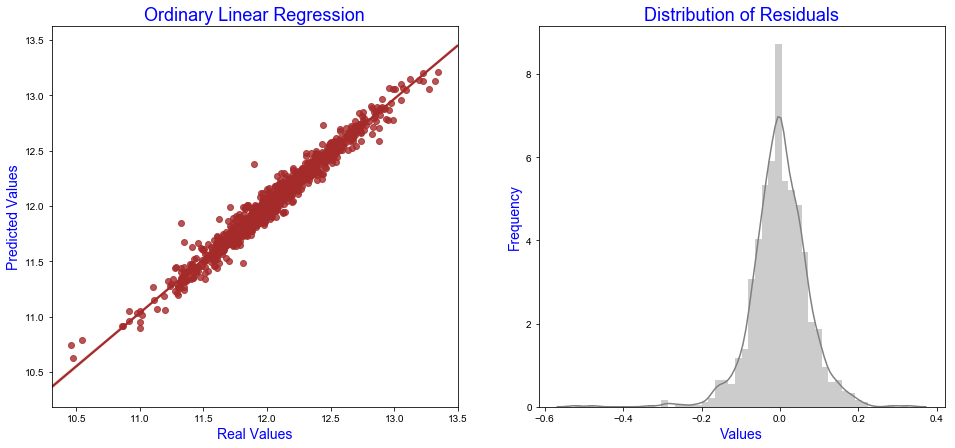

In [55]:
fig, ax = plt.subplots(figsize=(16, 7), nrows=1, ncols=2)
plt.style.use('seaborn-darkgrid')

ax1 = sns.regplot(y_train, linReg_predict, color='brown', ax=ax[0])
ax1.set_title('Ordinary Linear Regression', fontdict={'color' : 'blue', 'size' : 18})
ax1.set_xlabel('Real Values', fontdict={'color' : 'blue', 'size' : 14})
ax1.set_ylabel('Predicted Values', fontdict={'color' : 'blue', 'size' : 14})



ax2 = sns.distplot(linReg_residuals, ax=ax[1], color='gray')
ax2.set_title('Distribution of Residuals', fontdict={'color' : 'blue', 'size' : 18})
ax2.set_xlabel('Values', fontdict={'color' : 'blue', 'size' : 14})
ax2.set_ylabel('Frequency', fontdict={'color' : 'blue', 'size' : 14})

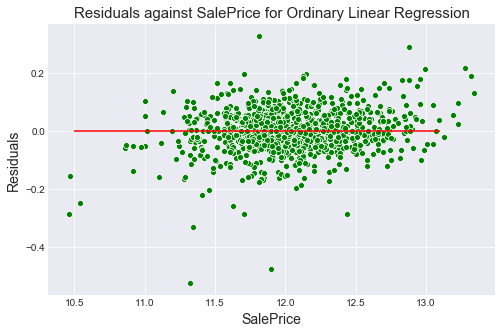

In [56]:
plt.figure(figsize=(8, 5))


ax = sns.scatterplot(y_train, linReg_residuals, color='green', palette='rainbow')
ax.set_title('Residuals against SalePrice for Ordinary Linear Regression', size=15)
ax.set_ylabel('Residuals', size=14)
ax.set_xlabel('SalePrice', size=14)
plt.hlines(y=0, xmin=10.5, xmax=13.1, colors='red')

In [57]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

<h3>Ridge Regression --- L2 Regularization</h3>

In [58]:
alpha_values = [
    0.01, 0.05, 0.1, 0.3, 0.7, 1.0, 1.4, 1.7, 2.0, 3.5, 
    5.0, 7.0, 10.0, 15.0, 20.0, 30.0, 40.0, 50.0
]


ridge = RidgeCV(alphas=alpha_values, scoring='neg_mean_squared_error', cv=cv)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_

print('Alpha value: {}'.format(alpha))
print()



print('To get a precise value for alpha, try values centered around {}'.format(alpha))
#we will search for values in-between 10 and 15, and also 15 and 20
precise_alpha_values = [
    0.7*alpha, 0.75*alpha, 0.80*alpha, 0.85*alpha, 0.90*alpha, 0.95*alpha, 1.05*alpha, 
    1.1*alpha, 1.15*alpha, 1.2*alpha, 1.25*alpha, 1.3*alpha
]

ridge = RidgeCV(alphas=precise_alpha_values, scoring='neg_mean_squared_error', cv=cv)
ridge.fit(X_train, y_train)
best_alpha = ridge.alpha_
print('Best Alpha: {}'.format(best_alpha))

ridge_predict = ridge.predict(X_test)

ridge_residuals = y_test - ridge_predict

ridge_rmse = rmse(ridge)

print('Ridge Regression --- L2 Regularization')
print('.'*55)
print()
print('RMSE: {:.4f}'.format(ridge_rmse.mean()))
print('Mean of Residuals: {:.4f}'.format(ridge_residuals.mean()))

Alpha value: 10.0

To get a precise value for alpha, try values centered around 10.0
Best Alpha: 11.5
Ridge Regression --- L2 Regularization
.......................................................

RMSE: 0.1190
Mean of Residuals: 0.0019


WOW!!! We have a much lower RMSE for Ridge Regression than ordinary Linear Regression. The mean of residuals of Ridge Regression is also very much close to 0 than ordinary Linear Regression.

Text(0, 0.5, 'Frequency')

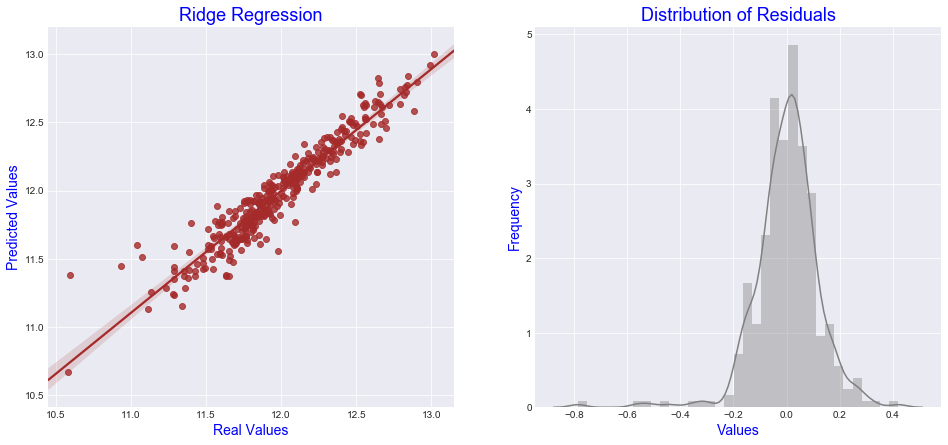

In [59]:
fig, ax = plt.subplots(figsize=(16, 7), nrows=1, ncols=2)
plt.style.use('seaborn-darkgrid')

ax1 = sns.regplot(y_test, ridge_predict, color='brown', ax=ax[0])
ax1.set_title('Ridge Regression', fontdict={'color' : 'blue', 'size' : 18})
ax1.set_xlabel('Real Values', fontdict={'color' : 'blue', 'size' : 14})
ax1.set_ylabel('Predicted Values', fontdict={'color' : 'blue', 'size' : 14})



ax2 = sns.distplot(ridge_residuals, ax=ax[1], color='gray')
ax2.set_title('Distribution of Residuals', fontdict={'color' : 'blue', 'size' : 18})
ax2.set_xlabel('Values', fontdict={'color' : 'blue', 'size' : 14})
ax2.set_ylabel('Frequency', fontdict={'color' : 'blue', 'size' : 14})

We can also see that the plot of the predicted values against the real values for Ridge Regression is much better than Rrdinary Linear Regression. Let's check our for Lasso Regression!

Ridge picked 465 features and eliminated 21 features


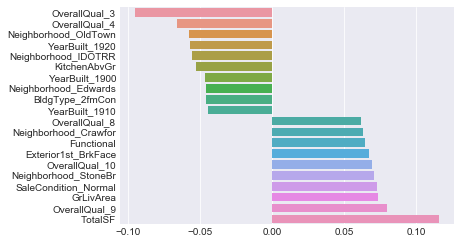

In [60]:
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print('Ridge picked {} features and eliminated {} features'.format(sum(coefs != 0), sum(coefs == 0)))

ridge_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
sns.barplot(ridge_coefs.values, ridge_coefs.index)

<h3>Lasso Regression --- L1 Regularization</h3>

In [61]:
alpha_values = [
    0.0001, 0.003, 0.0005, 0.007, 0.001, 0.0015, 0.002, 0.003, 0.005, 0.007, 0.01, 0.02, 
    0.05, 0.07, 0.1, 0.15, 0.20, 0.30, 0.50, 0.7, 1.0
]


lasso = LassoCV(alphas=alpha_values, cv=cv, max_iter=2500)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_

print('Alpha value: {}'.format(alpha))
print()



print('To get a precise value for alpha, try values centered around {}'.format(alpha))
#we will search for values in-between 10 and 15, and also 15 and 20
precise_alpha_values = [
    0.7*alpha, 0.75*alpha, 0.80*alpha, 0.85*alpha, 0.90*alpha, 0.95*alpha, 1.05*alpha, 
    1.1*alpha, 1.15*alpha, 1.2*alpha, 1.25*alpha, 1.3*alpha
]

lasso = LassoCV(alphas=precise_alpha_values, cv=cv, max_iter=2500)
lasso.fit(X_train, y_train)
best_alpha = lasso.alpha_
print('Best Alpha: {}'.format(best_alpha))

lasso_predict = lasso.predict(X_test)

lasso_residuals = y_test - lasso_predict

lasso_rmse = rmse(lasso)

print('Ridge Regression --- L2 Regularization')
print('.'*55)
print()
print('RMSE: {:.4f}'.format(lasso_rmse.mean()))
print('Mean of Residuals: {:.4f}'.format(lasso_residuals.mean()))

Alpha value: 0.0005

To get a precise value for alpha, try values centered around 0.0005
Best Alpha: 0.000575
Ridge Regression --- L2 Regularization
.......................................................

RMSE: 0.1166
Mean of Residuals: 0.0038


We now get a much more lower RMSE, with the mean of the residuals very much closer to 0.

Text(0, 0.5, 'Frequency')

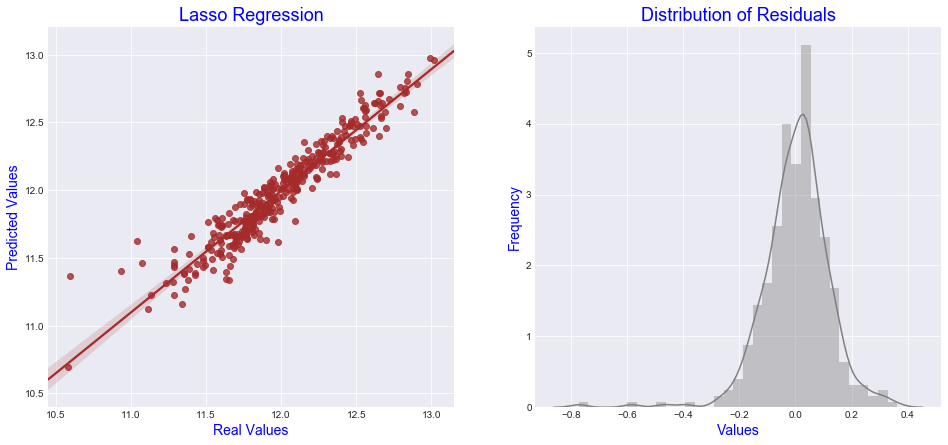

In [62]:
fig, ax = plt.subplots(figsize=(16, 7), nrows=1, ncols=2)
plt.style.use('seaborn-darkgrid')

ax1 = sns.regplot(y_test, lasso_predict, color='brown', ax=ax[0])
ax1.set_title('Lasso Regression', fontdict={'color' : 'blue', 'size' : 18})
ax1.set_xlabel('Real Values', fontdict={'color' : 'blue', 'size' : 14})
ax1.set_ylabel('Predicted Values', fontdict={'color' : 'blue', 'size' : 14})



ax2 = sns.distplot(lasso_residuals, ax=ax[1], color='gray')
ax2.set_title('Distribution of Residuals', fontdict={'color' : 'blue', 'size' : 18})
ax2.set_xlabel('Values', fontdict={'color' : 'blue', 'size' : 14})
ax2.set_ylabel('Frequency', fontdict={'color' : 'blue', 'size' : 14})

Ridge picked 107 features and eliminated 379 features


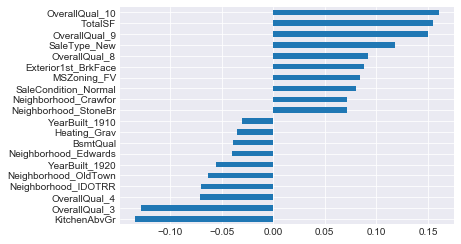

In [63]:
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print('Ridge picked {} features and eliminated {} features'.format(sum(coefs != 0), sum(coefs == 0)))

lasso_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
lasso_coefs.plot('barh')

<h3>Elastic Net</h3>

In [64]:
# 4* ElasticNet
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

elasticNet_predict = elasticNet.predict(X_test)
elasticNet_residuals = y_test - elasticNet_predict
elasticNet_rmse = rmse(elasticNet)


print('ElasticNet RMSE: {:.4f}'.format(elasticNet_rmse.mean()))
print('ElasticNet Residuals Mean: {:.4f}'.format(elasticNet_residuals.mean()))

Best l1_ratio : 0.85
Best alpha : 0.0006
Try again for more precision with l1_ratio centered around 0.85
Best l1_ratio : 0.85
Best alpha : 0.0006
Now try again for more precision on alpha, with l1_ratio fixed at 0.85 and alpha centered around 0.0006
Best l1_ratio : 0.85
Best alpha : 0.0006299999999999999
ElasticNet RMSE: 0.1164
ElasticNet Residuals Mean: 0.0037


Text(0, 0.5, 'Frequency')

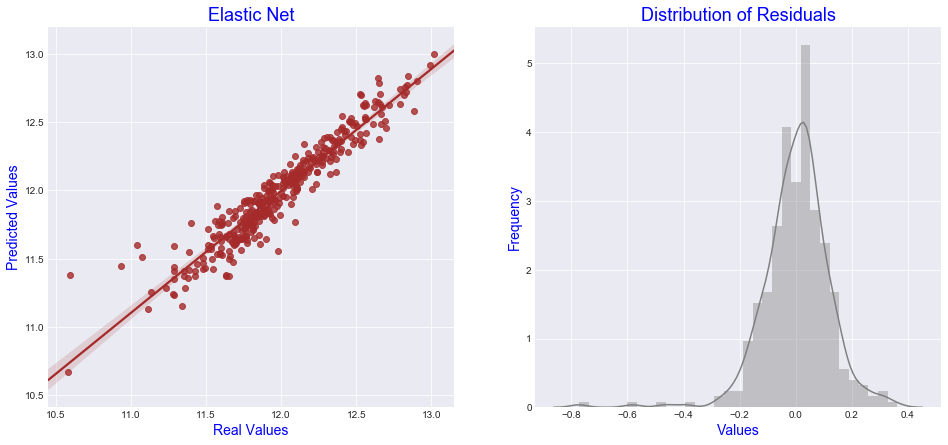

In [65]:
fig, ax = plt.subplots(figsize=(16, 7), nrows=1, ncols=2)
plt.style.use('seaborn-darkgrid')

ax1 = sns.regplot(y_test, ridge_predict, color='brown', ax=ax[0])
ax1.set_title('Elastic Net', fontdict={'color' : 'blue', 'size' : 18})
ax1.set_xlabel('Real Values', fontdict={'color' : 'blue', 'size' : 14})
ax1.set_ylabel('Predicted Values', fontdict={'color' : 'blue', 'size' : 14})



ax2 = sns.distplot(elasticNet_residuals, ax=ax[1], color='gray')
ax2.set_title('Distribution of Residuals', fontdict={'color' : 'blue', 'size' : 18})
ax2.set_xlabel('Values', fontdict={'color' : 'blue', 'size' : 14})
ax2.set_ylabel('Frequency', fontdict={'color' : 'blue', 'size' : 14})

Ridge picked 112 features and eliminated 374 features


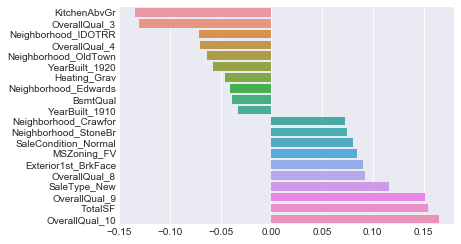

In [66]:
coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
print('Ridge picked {} features and eliminated {} features'.format(sum(coefs != 0), sum(coefs == 0)))

elasticNet_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
sns.barplot(elasticNet_coefs.values, elasticNet_coefs.index)

In [67]:
pd.DataFrame(
    {
        'RMSE' : [linReg_rmse.mean(), ridge_rmse.mean(), lasso_rmse.mean(), elasticNet_rmse.mean()],
        'Mean' : [linReg_residuals.mean(), ridge_residuals.mean(), lasso_residuals.mean(), elasticNet_residuals.mean()],
    },
    index = ['Logistic Regression', 'Ridge', 'Lasso', 'ElasticNet']
)

,RMSE,Mean
Logistic Regression,23860637.7502,0.0000
Ridge,0.1190,0.0019
Lasso,0.1166,0.0038
ElasticNet,0.1164,0.0037


In [70]:
test_predictions = np.expm1(elasticNet.predict(test_data))

submission = pd.DataFrame({'Id' : testId, 'SalePrice' : test_predictions})
submission.to_csv('sub.csv', index=False)

In [68]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

In [69]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X_train, y_train):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X_train, y_train)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [ ]:
averaged_models = AveragingModels(models=[ridge, lasso, elasticNet])

score = rmse(averaged_models)
score.mean()

In [ ]:
predictions = averaged_models.predict(test_data)

submission = pd.DataFrame({'Id' : testId, 'SalePrice' : test_predictions})
submission.to_csv('sub.csv', index=False)